In [12]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate

In [143]:
def plot_sample(output, target, save_path):
    img = np.hstack((output, target))
    plt.imsave(save_path, img, dpi=300)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
def minmax(arr):
    return (arr - np.min(arr))/(np.max(arr)-np.min(arr))

In [99]:
def minmax_over_nonzero(arr):
    arr_min = np.min(arr[np.nonzero(arr)])
    arr_max = np.max(arr)
    return (arr - arr_min)/(arr_max - arr_min)

In [2]:
def minmax_reverse(arr, min, max):
    return arr * (max - min) + min

In [3]:
def minmax_custom(arr, min, max):
    return (arr - min) / (max - min)

In [18]:
def minmax(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    return minmax_custom(arr, arr_min, arr_max)

In [6]:
def rebin(arr, new_shape):
    """Rebin 2D array arr to shape new_shape by averaging over nonzero elements."""
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    arr2 = arr.reshape(shape)
    cond = (arr2 > 0).sum(axis=(1, 3))
    out = np.zeros(new_shape)
    np.true_divide(arr2.sum(axis=(1, 3)), cond, where=(cond) > 0, out=out)
    return out

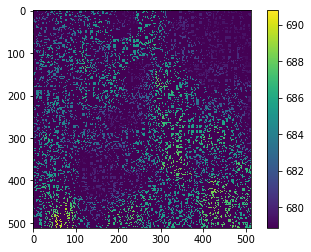

In [39]:
#dm = np.load("KirbyLeafOn2017DMEntireSite_53352_108756.dmp", allow_pickle=True)
dm = np.load("KirbyLeafOn2017DMEntireSite_99009_114912.dmp", allow_pickle=True)
plt.imshow(dm)
plt.clim(np.min(dm[np.nonzero(dm)]), np.max(dm))
plt.colorbar()

In [40]:
x = np.arange(0, dm.shape[1])
y = np.arange(0, dm.shape[0])
#mask invalid values
array = np.ma.masked_equal(dm, 0)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((y1, x1), newarr.ravel(),
                          (yy, xx),
                             method='nearest')

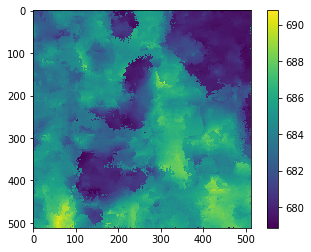

In [41]:
plt.imshow(GD1)
plt.colorbar()

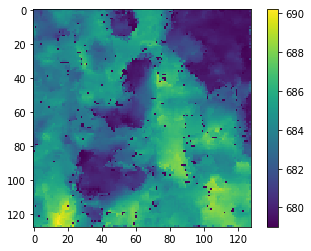

In [42]:
rebinned = rebin(dm, (128, 128))
plt.imshow(rebinned)
plt.clim(np.min(rebinned[np.nonzero(rebinned)]), np.max(rebinned))
plt.colorbar()

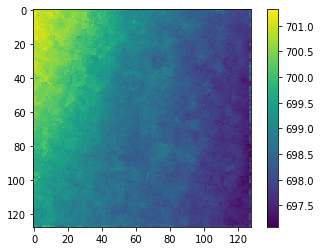

In [7]:
dm = np.load("KirbyLeafOn2017DMEntireSite_54378_110808.dmp", allow_pickle=True)
# plt.imshow(dm)
# plt.colorbar()
rebinned = rebin(dm, (128, 128))
plt.imshow(rebinned)
plt.colorbar()

In [8]:
rebinned[(rebinned<700)&(rebinned>699.6)]=0

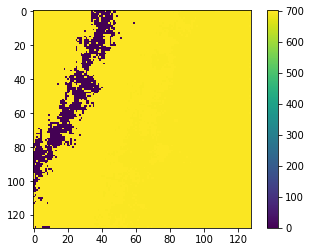

In [9]:
plt.imshow(rebinned)
plt.colorbar()

In [10]:
mask = (rebinned == 0).astype(int)
np.max(mask)

1

In [31]:
x = np.arange(0, rebinned.shape[1])
y = np.arange(0, rebinned.shape[0])
#mask invalid values
array = np.ma.masked_equal(rebinned, 0)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='nearest')

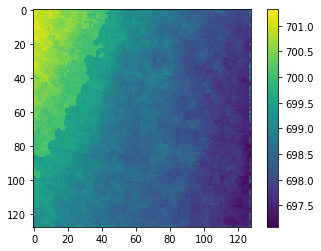

In [32]:
plt.imshow(GD1)
plt.colorbar()

In [2]:
import cv2

In [3]:
im = cv2.imread("KirbyLeafOn2017RGBNEntireSite_99522_108756_1tif.tif", cv2.IMREAD_UNCHANGED)
cv2.imshow("img", im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [5]:
blue, green, red, alpha = cv2.split(im)

ValueError: not enough values to unpack (expected 4, got 3)

In [8]:
cv2.imshow('red', red)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.imshow('alpha', alpha)
 
cv2.waitKey(0)
cv2.destroyAllWindows()